## **Import Liberies and Upload Data**

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

df = pd.read_csv("UI_UX jharkhand data - NOV 2024 - 25.csv")

df.head()

,Month,City,State,Interest Score,City Share (%),Monthly Searches,Unique Interested People,Online Students,Offline Institutes,Offline Students
0,2024-11,Ranchi,Jharkhand,10150.0,0.2926,5280,3960,40,4,400
1,2024-11,Jamshedpur,Jharkhand,8060.0,0.2322,4170,3150,30,3,300
2,2024-11,Dhanbad,Jharkhand,6230.0,0.1794,3240,2430,20,2,200
3,2024-11,Bokaro,Jharkhand,5240.0,0.1509,2730,2040,20,2,200
4,2024-11,Hazaribagh,Jharkhand,3160.0,0.0910,1650,1230,10,1,100


## **Data Understanding**

In [5]:
print(df.info())
print(df.describe())
print(df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Month                     84 non-null     object 
 1   City                      84 non-null     object 
 2   State                     84 non-null     object 
 3   Interest Score            84 non-null     float64
 4   City Share (%)            84 non-null     float64
 5   Monthly Searches          84 non-null     int64  
 6   Unique Interested People  84 non-null     int64  
 7   Online Students           84 non-null     int64  
 8   Offline Institutes        84 non-null     int64  
 9   Offline Students          84 non-null     int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 6.7+ KB
None
       Interest Score  City Share (%)  Monthly Searches  \
count       84.000000       84.000000         84.000000   
mean      5004.357143        0.150962       5122.452

In [6]:
df["Month"] = df["Month"].str.strip()
df.head()

,Month,City,State,Interest Score,City Share (%),Monthly Searches,Unique Interested People,Online Students,Offline Institutes,Offline Students
0,2024-11,Ranchi,Jharkhand,10150.0,0.2926,5280,3960,40,4,400
1,2024-11,Jamshedpur,Jharkhand,8060.0,0.2322,4170,3150,30,3,300
2,2024-11,Dhanbad,Jharkhand,6230.0,0.1794,3240,2430,20,2,200
3,2024-11,Bokaro,Jharkhand,5240.0,0.1509,2730,2040,20,2,200
4,2024-11,Hazaribagh,Jharkhand,3160.0,0.0910,1650,1230,10,1,100


## **Trend Analysis of UI/UX Demand**

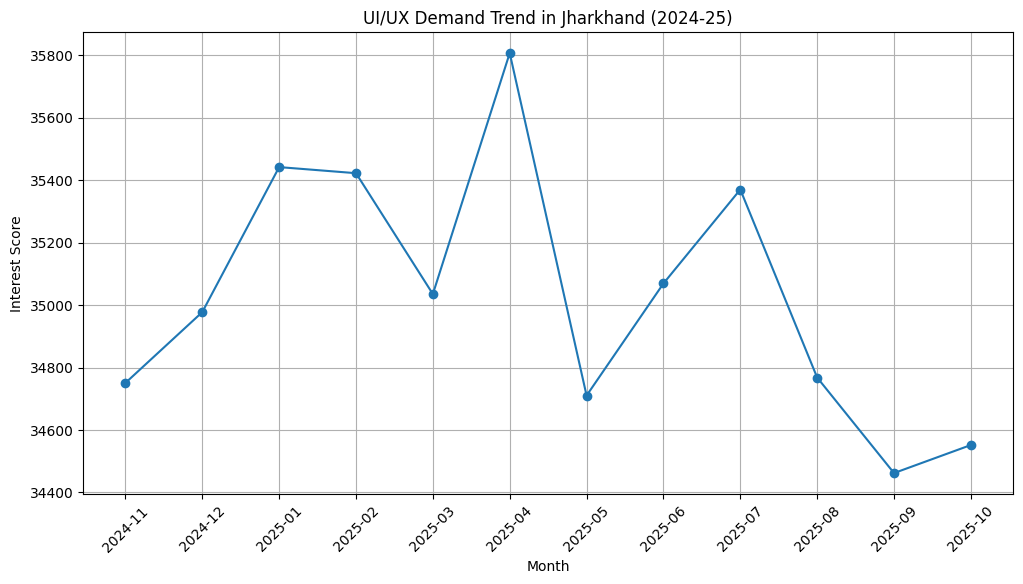

In [7]:
trend = df.groupby("Month")["Interest Score"].sum().reset_index()

plt.figure(figsize=(12,6))
plt.plot(trend["Month"], trend["Interest Score"], marker='o')
plt.title("UI/UX Demand Trend in Jharkhand (2024-25)")
plt.xlabel("Month")
plt.ylabel("Interest Score")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## **Top Demand Cities**

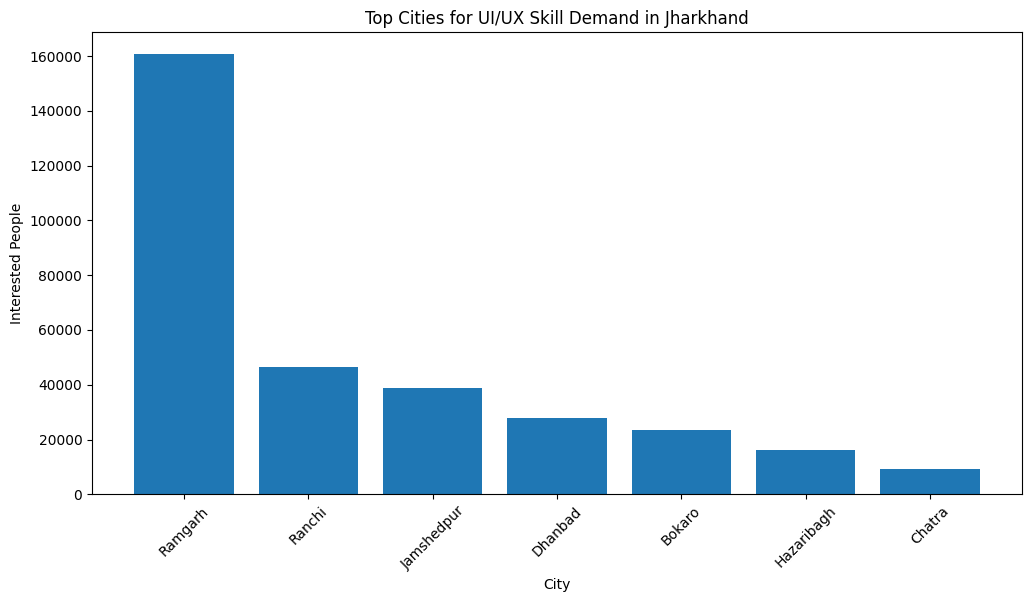

In [8]:
city_demand = df.groupby("City")["Unique Interested People"].sum().reset_index()

city_demand = city_demand.sort_values(by="Unique Interested People", ascending=False)

plt.figure(figsize=(12,6))
plt.bar(city_demand["City"], city_demand["Unique Interested People"])
plt.xticks(rotation=45)
plt.title("Top Cities for UI/UX Skill Demand in Jharkhand")
plt.xlabel("City")
plt.ylabel("Interested People")
plt.show()

## **Forecast for 2030**

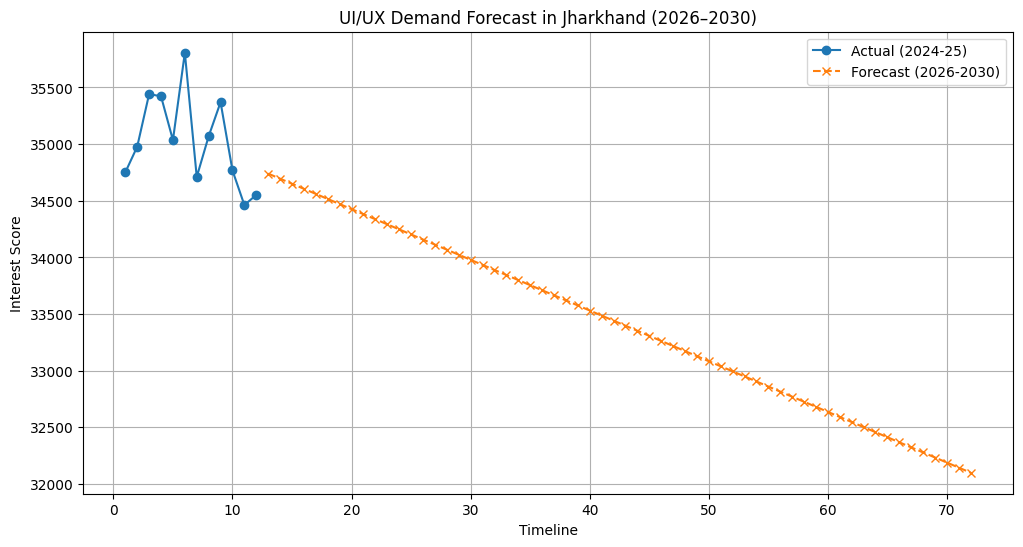

In [12]:
from sklearn.linear_model import LinearRegression
import numpy as np

trend["Month_Number"] = np.arange(1, len(trend)+1)

X = trend["Month_Number"].values.reshape(-1,1)
y = trend["Interest Score"]

model = LinearRegression()
model.fit(X, y)

future_months = np.arange(len(trend)+1, len(trend)+61).reshape(-1,1)
forecast = model.predict(future_months)

plt.figure(figsize=(12,6))
plt.plot(trend["Month_Number"], y, marker='o', label="Actual (2024-25)")
plt.plot(future_months, forecast, linestyle='--', marker='x', label="Forecast (2026-2030)")
plt.title("UI/UX Demand Forecast in Jharkhand (2026–2030)")
plt.xlabel("Timeline")
plt.ylabel("Interest Score")
plt.grid(True)
plt.legend()
plt.show()

## **Market Gap Analysis**

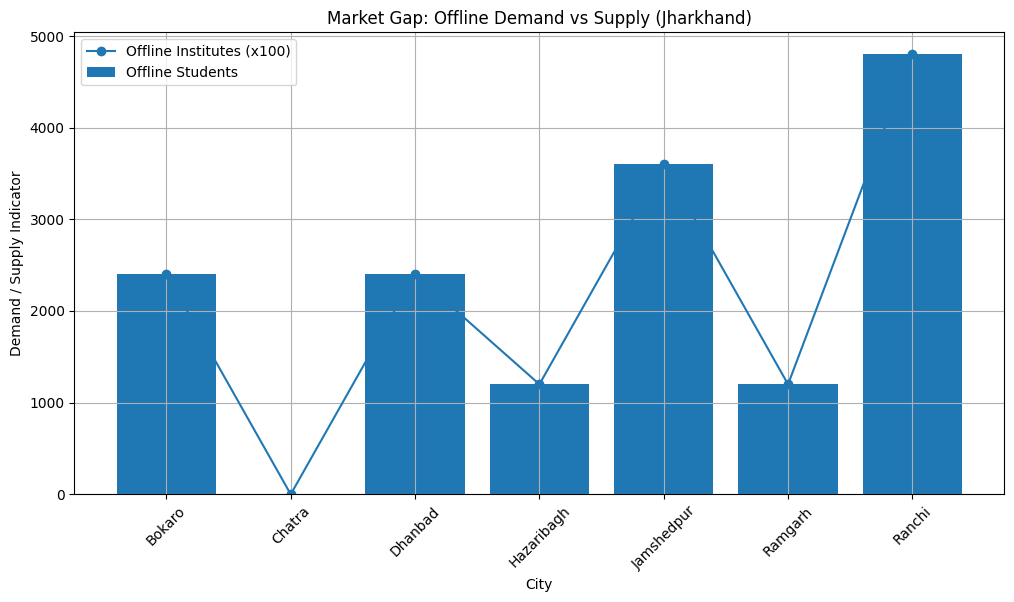

In [13]:
gap = df.groupby("City")[["Offline Students", "Offline Institutes"]].sum().reset_index()

plt.figure(figsize=(12,6))
plt.bar(gap["City"], gap["Offline Students"], label="Offline Students")
plt.plot(gap["City"], gap["Offline Institutes"]*100, marker='o', label="Offline Institutes (x100)")
plt.xticks(rotation=45)
plt.title("Market Gap: Offline Demand vs Supply (Jharkhand)")
plt.xlabel("City")
plt.ylabel("Demand / Supply Indicator")
plt.legend()
plt.grid(True)
plt.show()

## **Conversion Funnel**

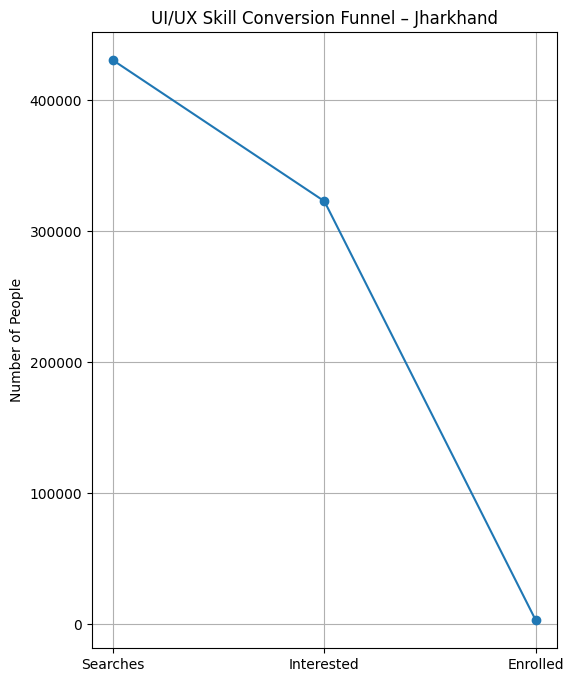

In [14]:
funnel = df[["Monthly Searches", "Unique Interested People", "Online Students"]].sum()

plt.figure(figsize=(6,8))
plt.plot(["Searches", "Interested", "Enrolled"], funnel, marker='o')
plt.title("UI/UX Skill Conversion Funnel – Jharkhand")
plt.ylabel("Number of People")
plt.grid(True)
plt.show()

## **Annual Growth Rate**

In [15]:
start = y.iloc[0]
end = y.iloc[-1]
years = len(trend) / 12

CAGR = ((end/start)**(1/years) - 1) * 100
print(f"UI/UX CAGR in Jharkhand: {CAGR:.2f}% per year")

UI/UX CAGR in Jharkhand: -0.57% per year
